In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Hospital_Cost_Report.csv')
df.head()

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,623132,10032,WEDOWEE HOSPITAL,301 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,99901.0,R,...,-924418.0,1007346.0,82928.0,NaN,82928.0,0.492667,9565.0,283713.0,NaN,NaN
1,628158,250042,NORTHWEST MS MEDICAL CENTER,1970 HOSPITAL DRIVE,CLARKSDALE,MS,38614,COAHOMA,99925.0,R,...,-354647.0,32396.0,-322251.0,NaN,-322251.0,0.119055,1820912.0,18432606.0,NaN,NaN
2,628833,440235,BIG SOUTH FORK MEDICAL CENTER,18797 ALBERTA ST,ONEIDA,TN,37841,SCOTT,99944.0,R,...,-1040992.0,14594.0,-1026398.0,NaN,-1026398.0,0.304565,NaN,NaN,NaN,NaN
3,631016,50523,SUTTER DELTA MEDICAL CENTER,3901 LONE TREE WAY,ANTIOCH,CA,94509-,CONTRA COSTA,36084.0,U,...,-494646.0,123863.0,-370783.0,NaN,-370783.0,0.208266,6070085.0,46484929.0,NaN,NaN
4,631094,50305,ALTA BATES MEDICAL CENTER,2450 ASHBY AVENUE,BERKELEY,CA,94705-,ALAMEDA,36084.0,U,...,-14934664.0,3257765.0,-11676899.0,NaN,-11676899.0,0.328278,12677344.0,80317659.0,NaN,72.0


In [3]:
df.columns

Index(['rpt_rec_num', 'Provider CCN', 'Hospital Name', 'Street Address',
       'City', 'State Code', 'Zip Code', 'County', 'Medicare CBSA Number',
       'Rural Versus Urban',
       ...
       'Net Income from Service to Patients', 'Total Other Income',
       'Total Income', 'Total Other Expenses', 'Net Income',
       'Cost To Charge Ratio', 'Net Revenue from Medicaid', 'Medicaid Charges',
       'Net Revenue from Stand-Alone SCHIP', 'Stand-Alone SCHIP Charges'],
      dtype='object', length=128)

In [4]:
df.shape

(6156, 128)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Columns: 128 entries, rpt_rec_num to Stand-Alone SCHIP Charges
dtypes: float64(114), int64(4), object(10)
memory usage: 6.0+ MB


In [6]:
df.isna().sum()

rpt_rec_num                              0
Provider CCN                             0
Hospital Name                            0
Street Address                           4
City                                     0
                                      ... 
Cost To Charge Ratio                  1380
Net Revenue from Medicaid             1585
Medicaid Charges                      1580
Net Revenue from Stand-Alone SCHIP    5191
Stand-Alone SCHIP Charges             5171
Length: 128, dtype: int64

In [7]:
df['Total Costs'].isna().sum()

77

In [8]:
df1 = df.drop(['rpt_rec_num', 'Provider CCN', 'Hospital Name', 'Street Address', 'City','State Code','Zip Code', 'County', 
               'Medicare CBSA Number', 'Rural Versus Urban', 'CCN Facility Type', 'Provider Type', 'Type of Control', 
               'FTE - Employees on Payroll', 'Number of Interns and Residents (FTE)', 'Total Days Title V', 'Total Days Title XVIII', 
               'Total Days Title XIX', 'Total Days (V + XVIII + XIX + Unknown)', 'Number of Beds', 'Total Bed Days Available', 
               'Total Discharges Title V', 'Total Discharges Title XVIII', 'Total Discharges Title XIX', 
               'Total Discharges (V + XVIII + XIX + Unknown)', 'Total Days Title V + Total for all Subproviders', 
               'Total Days Title XVIII + Total for all Subproviders', 'Total Days Title XIX + Total for all Subproviders',
               'Total Days (V + XVIII + XIX + Unknown) + Total for all Subproviders', 'Number of Beds + Total for all Subproviders', 
               'Total Bed Days Available + Total for all Subproviders', 'Total Discharges Title V + Total for all Subproviders', 
               'Total Discharges Title XVIII + Total for all Subproviders', 'Total Discharges Title XIX + Total for all Subproviders',
               'Total Discharges (V + XVIII + XIX + Unknown) + Total for all Subproviders', 
               'Hospital Total Days Title V For  Adults & Peds', 'Hospital Total Days Title XVIII For  Adults & Peds', 
               'Hospital Total Days Title XIX For  Adults & Peds', 
               'Hospital Total Days (V + XVIII + XIX + Unknown) For  Adults & Peds', 'Hospital Number of Beds For  Adults & Peds', 
               'Hospital Total Bed Days Available For  Adults & Peds', 'Hospital Total Discharges Title V For  Adults & Peds', 
               'Hospital Total Discharges Title XVIII For  Adults & Peds', 'Hospital Total Discharges Title XIX For  Adults & Peds', 
               'Hospital Total Discharges (V + XVIII + XIX + Unknown) For  Adults & Peds', 
               'Combined Outpatient + Inpatient Total Charges', 'Wage-Related Costs (RHC/FQHC)', 
               'Wage Related Costs for Part - A Teaching Physicians', 'Wage Related Costs for Interns and Residents', 'Land', 
               'Land Improvements', 'Buildings', 'Leasehold Improvements', 'Fixed Equipment', 'Major Movable Equipment', 
               'Minor Equipment Depreciable', 'Health Information Technology Designated Assets', 'Deferred Income',
               'Mortgage Payable', 'Unsecured Loans', 'Other Long Term Liabilities', 
               'DRG Amounts Other Than Outlier Payments', 'DRG Amounts for Model 4 BPCI before October 1', 
               'DRG Amounts for Model 4 BPCI after October 1', 'Total IME Payment', 'Total Other Expenses', 
               'Net Revenue from Stand-Alone SCHIP', 'Stand-Alone SCHIP Charges'], axis = 1)

In [9]:
df1.columns

Index(['Fiscal Year Begin Date', 'Fiscal Year End Date',
       'Cost of Charity Care', 'Total Bad Debt Expense',
       'Cost of Uncompensated Care',
       'Total Unreimbursed and Uncompensated Care',
       'Total Salaries From Worksheet A', 'Overhead Non-Salary Costs',
       'Depreciation Cost', 'Total Costs', 'Inpatient Total Charges',
       'Outpatient Total Charges', 'Wage-Related Costs (Core)',
       'Total Salaries (adjusted)', 'Contract Labor',
       'Cash on Hand and in Banks', 'Temporary Investments',
       'Notes Receivable', 'Accounts Receivable',
       'Less: Allowances for Uncollectible Notes and Accounts Receivable',
       'Inventory', 'Prepaid Expenses', 'Other Current Assets',
       'Total Current Assets', 'Total fixed Assets', 'Investments',
       'Other Assets', 'Total Other Assets', 'Total Assets',
       'Accounts Payable', 'Salaries, Wages, and Fees Payable',
       'Payroll Taxes Payable', 'Notes and Loans Payable (Short Term)',
       'Other Current L

In [10]:
df1['Fiscal Year Begin Date'] = pd.to_datetime(df1['Fiscal Year Begin Date'])
df1['Fiscal Year Begin Date']

0      2017-10-01
1      2017-11-01
2      2017-10-11
3      2018-01-01
4      2018-01-01
          ...    
6151   2018-07-01
6152   2018-07-01
6153   2018-07-01
6154   2017-10-01
6155   2018-07-01
Name: Fiscal Year Begin Date, Length: 6156, dtype: datetime64[ns]

In [11]:
df1['Begin_day_new'] = df1['Fiscal Year Begin Date'].dt.day
df1['Begin_month_new'] = df1['Fiscal Year Begin Date'].dt.month
df1['Begin_year_new'] = df1['Fiscal Year Begin Date'].dt.year

In [12]:
df1['Fiscal Year End Date'] = pd.to_datetime(df1['Fiscal Year End Date'])
df1['Fiscal Year End Date']

0      2017-11-13
1      2017-12-31
2      2017-12-31
3      2018-02-28
4      2018-02-28
          ...    
6151   2019-01-27
6152   2019-06-30
6153   2019-06-30
6154   2018-09-30
6155   2019-06-30
Name: Fiscal Year End Date, Length: 6156, dtype: datetime64[ns]

In [13]:
df1['End_day_new'] = df1['Fiscal Year End Date'].dt.day
df1['End_month_new'] = df1['Fiscal Year End Date'].dt.month
df1['End_year_new'] = df1['Fiscal Year End Date'].dt.year

In [14]:
df1 = df1.drop(['Fiscal Year Begin Date'], axis=1)

In [15]:
df1 = df1.drop(['Fiscal Year End Date'], axis=1)

In [16]:
df1

,Cost of Charity Care,Total Bad Debt Expense,Cost of Uncompensated Care,Total Unreimbursed and Uncompensated Care,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Depreciation Cost,Total Costs,Inpatient Total Charges,Outpatient Total Charges,...,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Begin_day_new,Begin_month_new,Begin_year_new,End_day_new,End_month_new,End_year_new
0,4016.0,263275.0,129929.0,260140.0,526707.0,797750.0,33286.0,1045317.0,3.059110e+05,1.815840e+06,...,82928.0,0.492667,9565.0,283713.0,1,10,2017,13,11,2017
1,NaN,1984928.0,251208.0,251208.0,3013251.0,5892944.0,288014.0,7795912.0,2.774107e+07,3.774071e+07,...,-322251.0,0.119055,1820912.0,18432606.0,1,11,2017,31,12,2017
2,NaN,500576.0,152458.0,152458.0,1009269.0,1543566.0,30861.0,1842485.0,1.903545e+06,4.146026e+06,...,-1026398.0,0.304565,NaN,NaN,11,10,2017,31,12,2017
3,519714.0,4922623.0,1605581.0,1649925.0,14205165.0,20882227.0,1314021.0,29173301.0,8.803734e+07,5.203984e+07,...,-370783.0,0.208266,6070085.0,46484929.0,1,1,2018,28,2,2018
4,672121.0,20492826.0,7466444.0,14922893.0,37145295.0,81178869.0,4345110.0,97713796.0,1.719357e+08,1.257200e+08,...,-11676899.0,0.328278,12677344.0,80317659.0,1,1,2018,28,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,2120514.0,2929861.0,3705291.0,7588803.0,18198194.0,22008984.0,2324786.0,34745411.0,1.121337e+08,8.671658e+07,...,-10990346.0,0.174732,6528726.0,78607136.0,1,7,2018,27,1,2019
6152,NaN,496069.0,501733.0,531545.0,2993173.0,4041820.0,170030.0,6030642.0,4.262590e+06,1.683303e+06,...,691836.0,1.014253,197164.0,223786.0,1,7,2018,30,6,2019
6153,408.0,24396.0,28690.0,161223.0,3662555.0,5051829.0,550251.0,7986343.0,1.263074e+06,7.635318e+06,...,821364.0,0.897504,348060.0,535477.0,1,7,2018,30,6,2019
6154,11900247.0,123582036.0,55837035.0,55837035.0,251918779.0,496950622.0,44845020.0,690664225.0,1.361734e+09,1.410864e+09,...,79901000.0,0.249104,54043262.0,315290793.0,1,10,2017,30,9,2018


In [17]:
df1.isna().sum()

Cost of Charity Care                         1824
Total Bad Debt Expense                       1491
Cost of Uncompensated Care                   1446
Total Unreimbursed and Uncompensated Care    1429
Total Salaries From Worksheet A                79
                                             ... 
Begin_month_new                                 0
Begin_year_new                                  0
End_day_new                                     0
End_month_new                                   0
End_year_new                                    0
Length: 64, dtype: int64

In [18]:
df1['Net Revenue from Medicaid'].isna().sum()

1585

In [19]:
df1['Net Revenue from Medicaid'].isna()

0       False
1       False
2        True
3       False
4       False
        ...  
6151    False
6152    False
6153    False
6154    False
6155    False
Name: Net Revenue from Medicaid, Length: 6156, dtype: bool

In [20]:
df1['Total Bad Debt Expense'].isna().sum()

1491

In [21]:
df1['Total Salaries From Worksheet A'].isna().sum()

79

In [22]:
df1['Overhead Non-Salary Costs'].isna().sum()

77

In [23]:
df1['Depreciation Cost'].isna().sum()

130

In [24]:
df1['Inpatient Total Charges'].isna().sum()

81

In [25]:
df1['Outpatient Total Charges'].isna().sum()

475

In [26]:
df1['Wage-Related Costs (Core)'].isna().sum()

2604

In [27]:
df1['Total Salaries (adjusted)'].isna().sum()

2154

In [28]:
df1['Cash on Hand and in Banks'].isna().sum()

494

In [29]:
df1['General Fund Balance'].isna().sum()

289

In [30]:
df1['Outlier payments for discharges'].isna().sum()

3164

In [31]:
df1['Outpatient Revenue'].isna().sum()

754

In [32]:
df1['Cost To Charge Ratio'].isna().sum()

1380

In [33]:
df1['Less Total Operating Expense'].isna().sum()

77

In [34]:
df1.describe()

,Cost of Charity Care,Total Bad Debt Expense,Cost of Uncompensated Care,Total Unreimbursed and Uncompensated Care,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Depreciation Cost,Total Costs,Inpatient Total Charges,Outpatient Total Charges,...,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Begin_day_new,Begin_month_new,Begin_year_new,End_day_new,End_month_new,End_year_new
count,4.332000e+03,4.665000e+03,4.710000e+03,4.727000e+03,6.077000e+03,6.079000e+03,6.026000e+03,6.079000e+03,6.075000e+03,5.681000e+03,...,6.065000e+03,4776.000000,4.571000e+03,4.576000e+03,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000
mean,4.742004e+06,1.227828e+07,8.443972e+06,1.396857e+07,6.497661e+07,1.096685e+08,8.139496e+06,1.417642e+08,3.324757e+08,3.290732e+08,...,7.452477e+06,0.961737,2.339393e+07,1.393780e+08,1.167966,5.076186,2017.831709,30.304418,8.735218,2018.421865
std,1.650372e+07,2.329921e+07,2.156961e+07,3.149173e+07,1.343971e+08,2.223134e+08,1.761950e+07,2.665741e+08,7.312209e+08,6.208783e+08,...,7.626313e+07,29.482127,5.285218e+07,2.952640e+08,1.812598,3.581913,0.374155,2.112803,3.022483,0.498155
min,6.000000e+00,-1.855990e+05,-2.015940e+05,-2.015940e+05,6.775700e+04,3.002860e+05,-5.314378e+07,6.320280e+05,1.000000e+02,3.600000e+01,...,-1.098320e+09,0.054027,-1.137917e+07,1.000000e+00,1.000000,1.000000,2017.000000,1.000000,1.000000,2017.000000
25%,1.574015e+05,1.364424e+06,9.455648e+05,1.626598e+06,8.417333e+06,1.099106e+07,7.116010e+05,1.778978e+07,1.398078e+07,1.830999e+07,...,-1.159545e+06,0.197959,1.970070e+06,8.045811e+06,1.000000,1.000000,2018.000000,30.000000,6.000000,2018.000000
50%,9.349660e+05,4.590122e+06,2.764652e+06,5.093386e+06,2.071686e+07,3.189015e+07,2.295378e+06,4.464666e+07,5.889109e+07,1.005592e+08,...,1.206160e+06,0.288964,6.980087e+06,3.812531e+07,1.000000,7.000000,2018.000000,31.000000,9.000000,2018.000000
75%,3.734020e+06,1.315047e+07,8.080881e+06,1.426570e+07,6.558811e+07,1.128587e+08,8.228334e+06,1.496536e+08,3.148580e+08,4.066406e+08,...,1.002534e+07,0.470044,2.142729e+07,1.426750e+08,1.000000,7.000000,2018.000000,31.000000,12.000000,2019.000000
max,5.954022e+08,4.237406e+08,6.382775e+08,6.503802e+08,2.748795e+09,3.238863e+09,3.540498e+08,4.919291e+09,1.342536e+10,1.290112e+10,...,1.623851e+09,2007.941320,1.176750e+09,4.732927e+09,31.000000,12.000000,2018.000000,31.000000,12.000000,2019.000000


In [35]:
df1.fillna(df1.mean(), inplace=True)

In [36]:
df1.describe()

,Cost of Charity Care,Total Bad Debt Expense,Cost of Uncompensated Care,Total Unreimbursed and Uncompensated Care,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Depreciation Cost,Total Costs,Inpatient Total Charges,Outpatient Total Charges,...,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Begin_day_new,Begin_month_new,Begin_year_new,End_day_new,End_month_new,End_year_new
count,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,...,6.156000e+03,6156.000000,6.156000e+03,6.156000e+03,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000
mean,4.742004e+06,1.227828e+07,8.443972e+06,1.396857e+07,6.497661e+07,1.096685e+08,8.139496e+06,1.417642e+08,3.324757e+08,3.290732e+08,...,7.452477e+06,0.961737,2.339393e+07,1.393780e+08,1.167966,5.076186,2017.831709,30.304418,8.735218,2018.421865
std,1.384401e+07,2.028179e+07,1.886656e+07,2.759493e+07,1.335318e+08,2.209185e+08,1.743244e+07,2.649014e+08,7.263935e+08,5.964398e+08,...,7.569727e+07,25.967580,4.554146e+07,2.545611e+08,1.812598,3.581913,0.374155,2.112803,3.022483,0.498155
min,6.000000e+00,-1.855990e+05,-2.015940e+05,-2.015940e+05,6.775700e+04,3.002860e+05,-5.314378e+07,6.320280e+05,1.000000e+02,3.600000e+01,...,-1.098320e+09,0.054027,-1.137917e+07,1.000000e+00,1.000000,1.000000,2017.000000,1.000000,1.000000,2017.000000
25%,3.781538e+05,2.066814e+06,1.370014e+06,2.307436e+06,8.487290e+06,1.109159e+07,7.282365e+05,1.796326e+07,1.432694e+07,2.221344e+07,...,-1.111741e+06,0.222492,3.125208e+06,1.340723e+07,1.000000,1.000000,2018.000000,30.000000,6.000000,2018.000000
50%,2.911040e+06,8.944558e+06,5.315540e+06,9.441104e+06,2.122441e+07,3.268796e+07,2.404736e+06,4.564988e+07,6.080247e+07,1.303266e+08,...,1.315532e+06,0.371497,1.475986e+07,9.526777e+07,1.000000,7.000000,2018.000000,31.000000,9.000000,2018.000000
75%,4.742004e+06,1.227828e+07,8.443972e+06,1.396857e+07,6.497661e+07,1.102142e+08,8.139496e+06,1.478107e+08,3.324757e+08,3.691314e+08,...,9.735268e+06,0.918104,2.339393e+07,1.393780e+08,1.000000,7.000000,2018.000000,31.000000,12.000000,2019.000000
max,5.954022e+08,4.237406e+08,6.382775e+08,6.503802e+08,2.748795e+09,3.238863e+09,3.540498e+08,4.919291e+09,1.342536e+10,1.290112e+10,...,1.623851e+09,2007.941320,1.176750e+09,4.732927e+09,31.000000,12.000000,2018.000000,31.000000,12.000000,2019.000000


In [37]:
df1['Cost of Charity Care'].isna().sum()

0

In [38]:
df1['Cost of Charity Care'].unique

<bound method Series.unique of 0       4.016000e+03
1       4.742004e+06
2       4.742004e+06
3       5.197140e+05
4       6.721210e+05
            ...     
6151    2.120514e+06
6152    4.742004e+06
6153    4.080000e+02
6154    1.190025e+07
6155    7.676580e+05
Name: Cost of Charity Care, Length: 6156, dtype: float64>

In [39]:
df1['Total Costs'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6151    False
6152    False
6153    False
6154    False
6155    False
Name: Total Costs, Length: 6156, dtype: bool

In [40]:
df1['Net Revenue from Medicaid'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6151    False
6152    False
6153    False
6154    False
6155    False
Name: Net Revenue from Medicaid, Length: 6156, dtype: bool

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 64 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Cost of Charity Care                                              6156 non-null   float64
 1   Total Bad Debt Expense                                            6156 non-null   float64
 2   Cost of Uncompensated Care                                        6156 non-null   float64
 3   Total Unreimbursed and Uncompensated Care                         6156 non-null   float64
 4   Total Salaries From Worksheet A                                   6156 non-null   float64
 5   Overhead Non-Salary Costs                                         6156 non-null   float64
 6   Depreciation Cost                                                 6156 non-null   float64
 7   Total Costs                      

In [42]:
df1.describe()

,Cost of Charity Care,Total Bad Debt Expense,Cost of Uncompensated Care,Total Unreimbursed and Uncompensated Care,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Depreciation Cost,Total Costs,Inpatient Total Charges,Outpatient Total Charges,...,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Begin_day_new,Begin_month_new,Begin_year_new,End_day_new,End_month_new,End_year_new
count,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,6.156000e+03,...,6.156000e+03,6156.000000,6.156000e+03,6.156000e+03,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000
mean,4.742004e+06,1.227828e+07,8.443972e+06,1.396857e+07,6.497661e+07,1.096685e+08,8.139496e+06,1.417642e+08,3.324757e+08,3.290732e+08,...,7.452477e+06,0.961737,2.339393e+07,1.393780e+08,1.167966,5.076186,2017.831709,30.304418,8.735218,2018.421865
std,1.384401e+07,2.028179e+07,1.886656e+07,2.759493e+07,1.335318e+08,2.209185e+08,1.743244e+07,2.649014e+08,7.263935e+08,5.964398e+08,...,7.569727e+07,25.967580,4.554146e+07,2.545611e+08,1.812598,3.581913,0.374155,2.112803,3.022483,0.498155
min,6.000000e+00,-1.855990e+05,-2.015940e+05,-2.015940e+05,6.775700e+04,3.002860e+05,-5.314378e+07,6.320280e+05,1.000000e+02,3.600000e+01,...,-1.098320e+09,0.054027,-1.137917e+07,1.000000e+00,1.000000,1.000000,2017.000000,1.000000,1.000000,2017.000000
25%,3.781538e+05,2.066814e+06,1.370014e+06,2.307436e+06,8.487290e+06,1.109159e+07,7.282365e+05,1.796326e+07,1.432694e+07,2.221344e+07,...,-1.111741e+06,0.222492,3.125208e+06,1.340723e+07,1.000000,1.000000,2018.000000,30.000000,6.000000,2018.000000
50%,2.911040e+06,8.944558e+06,5.315540e+06,9.441104e+06,2.122441e+07,3.268796e+07,2.404736e+06,4.564988e+07,6.080247e+07,1.303266e+08,...,1.315532e+06,0.371497,1.475986e+07,9.526777e+07,1.000000,7.000000,2018.000000,31.000000,9.000000,2018.000000
75%,4.742004e+06,1.227828e+07,8.443972e+06,1.396857e+07,6.497661e+07,1.102142e+08,8.139496e+06,1.478107e+08,3.324757e+08,3.691314e+08,...,9.735268e+06,0.918104,2.339393e+07,1.393780e+08,1.000000,7.000000,2018.000000,31.000000,12.000000,2019.000000
max,5.954022e+08,4.237406e+08,6.382775e+08,6.503802e+08,2.748795e+09,3.238863e+09,3.540498e+08,4.919291e+09,1.342536e+10,1.290112e+10,...,1.623851e+09,2007.941320,1.176750e+09,4.732927e+09,31.000000,12.000000,2018.000000,31.000000,12.000000,2019.000000


<AxesSubplot:>

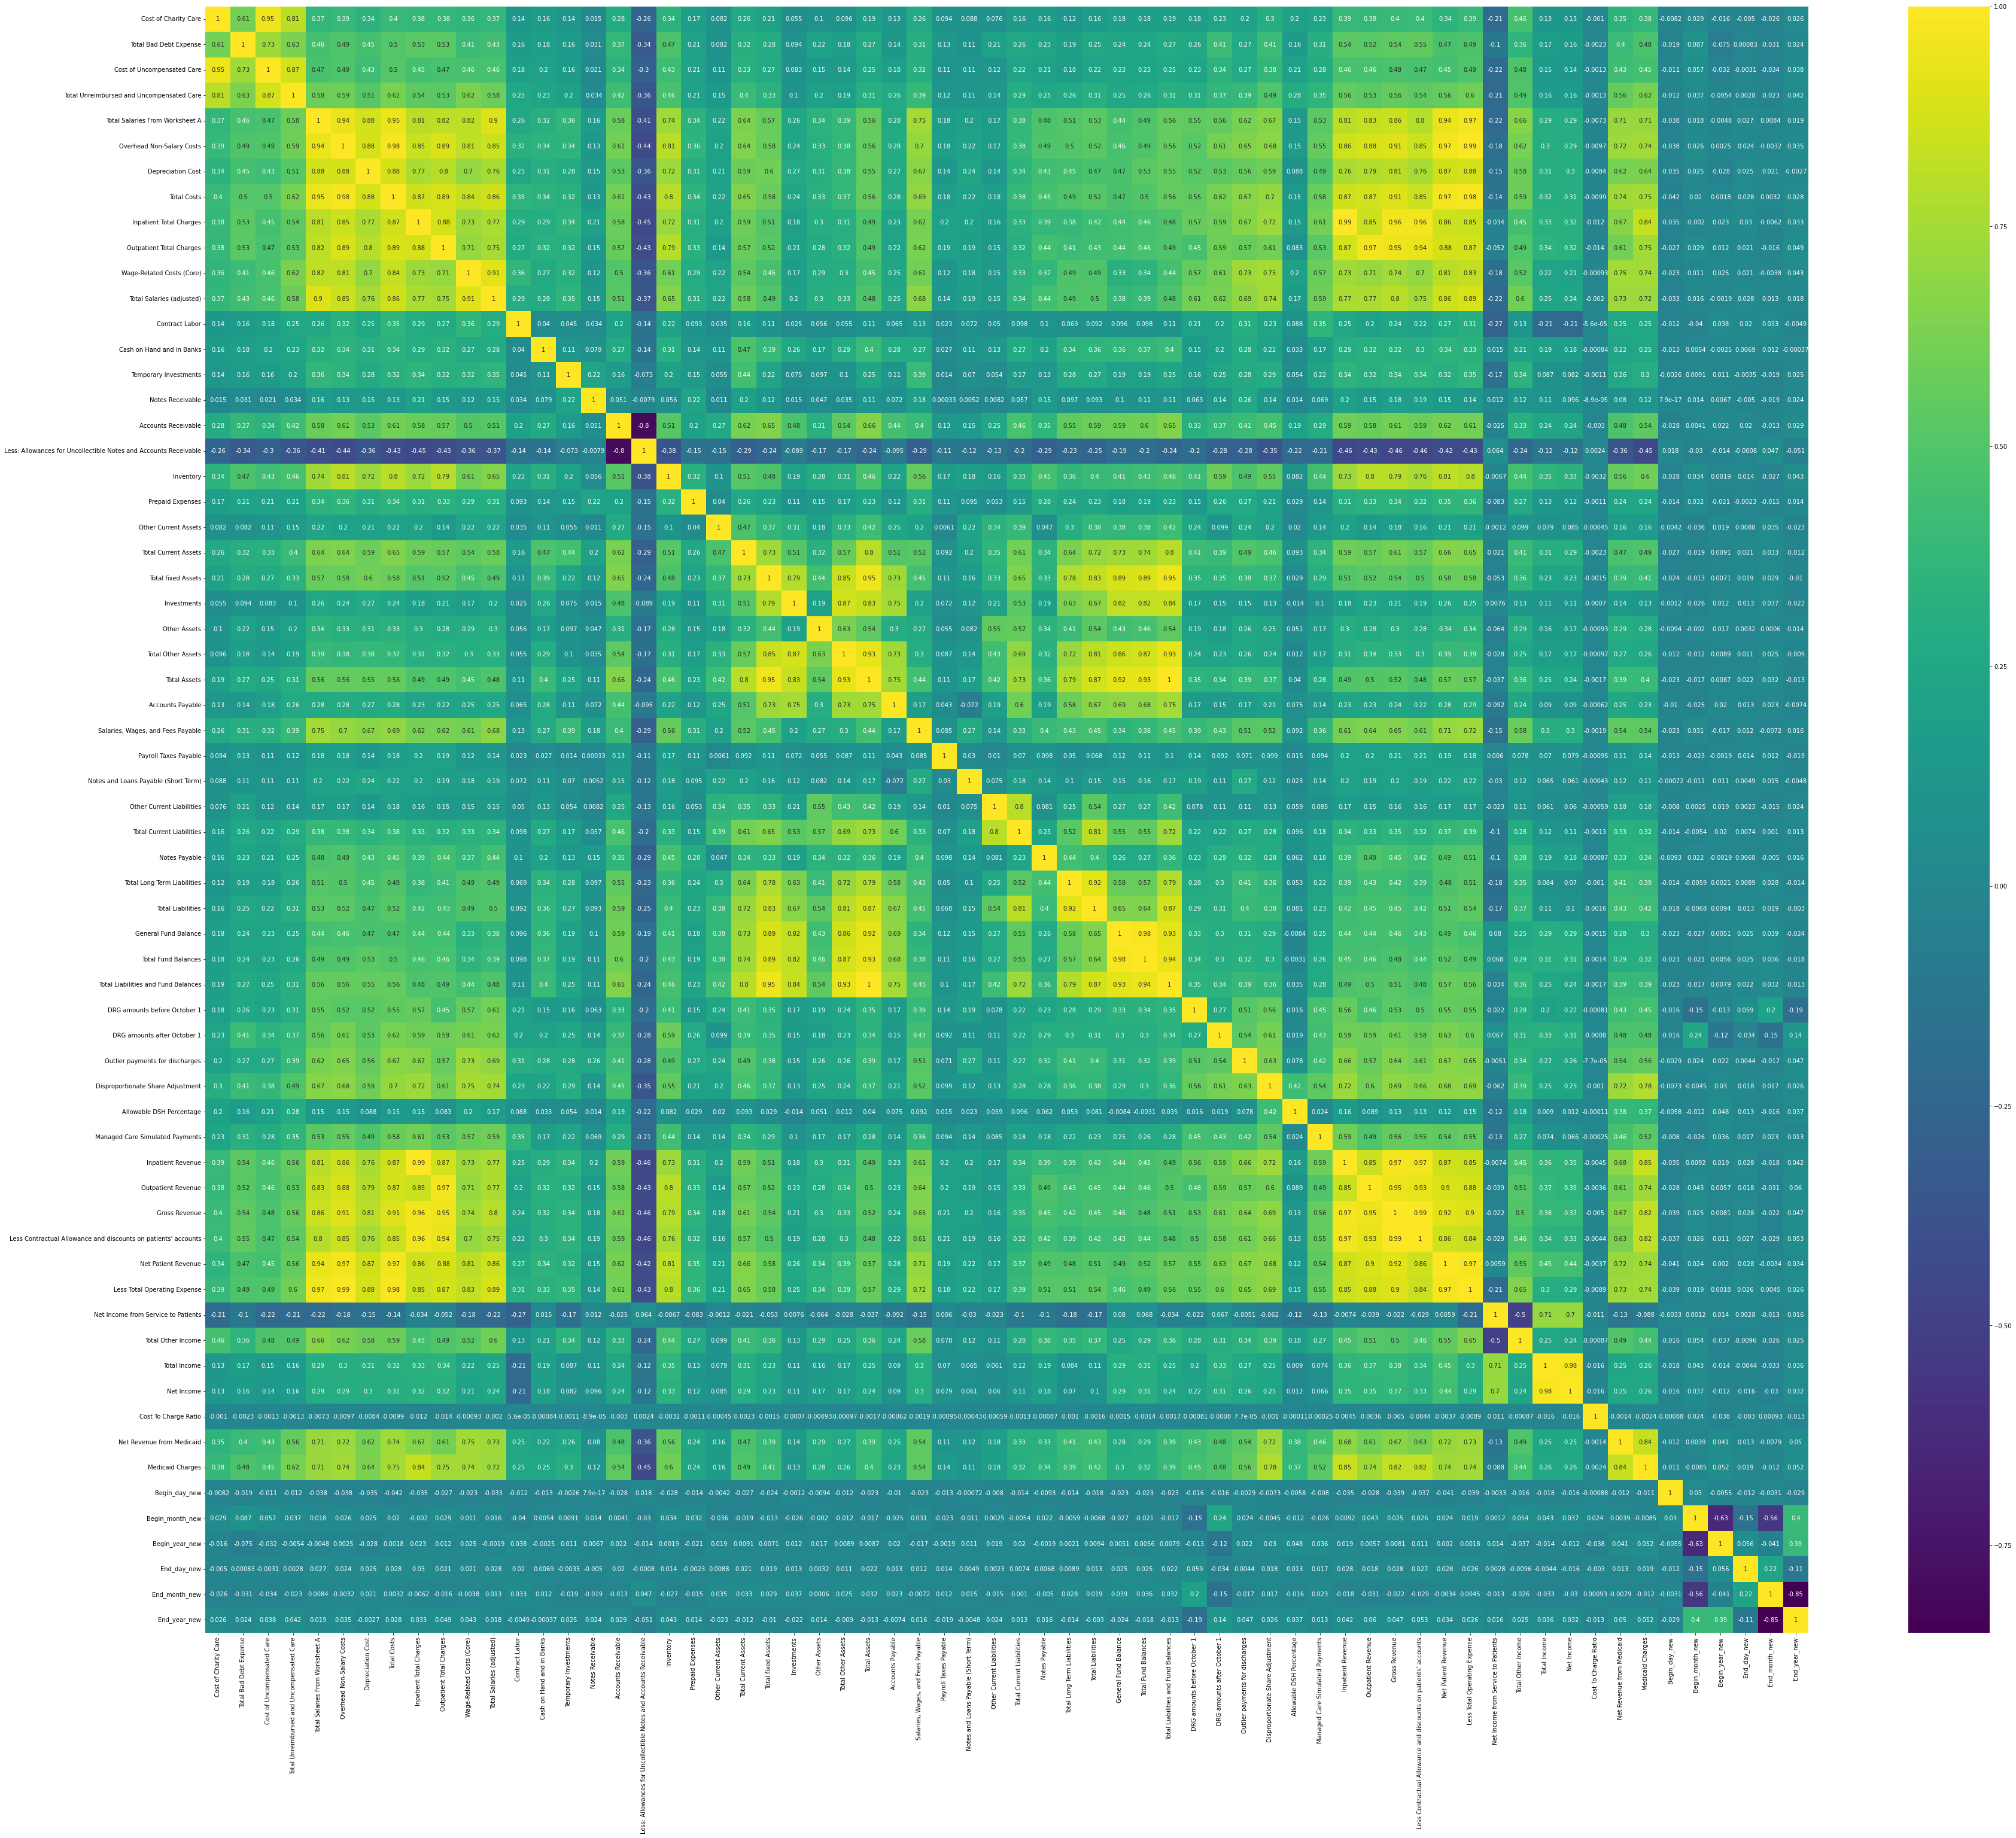

In [43]:
fig, ax = plt.subplots(figsize=(60, 50))
sns.heatmap(df1.corr(), annot=True, fmt='.2g', cmap='viridis', cbar=True)

In [44]:
import warnings
warnings.filterwarnings('ignore')

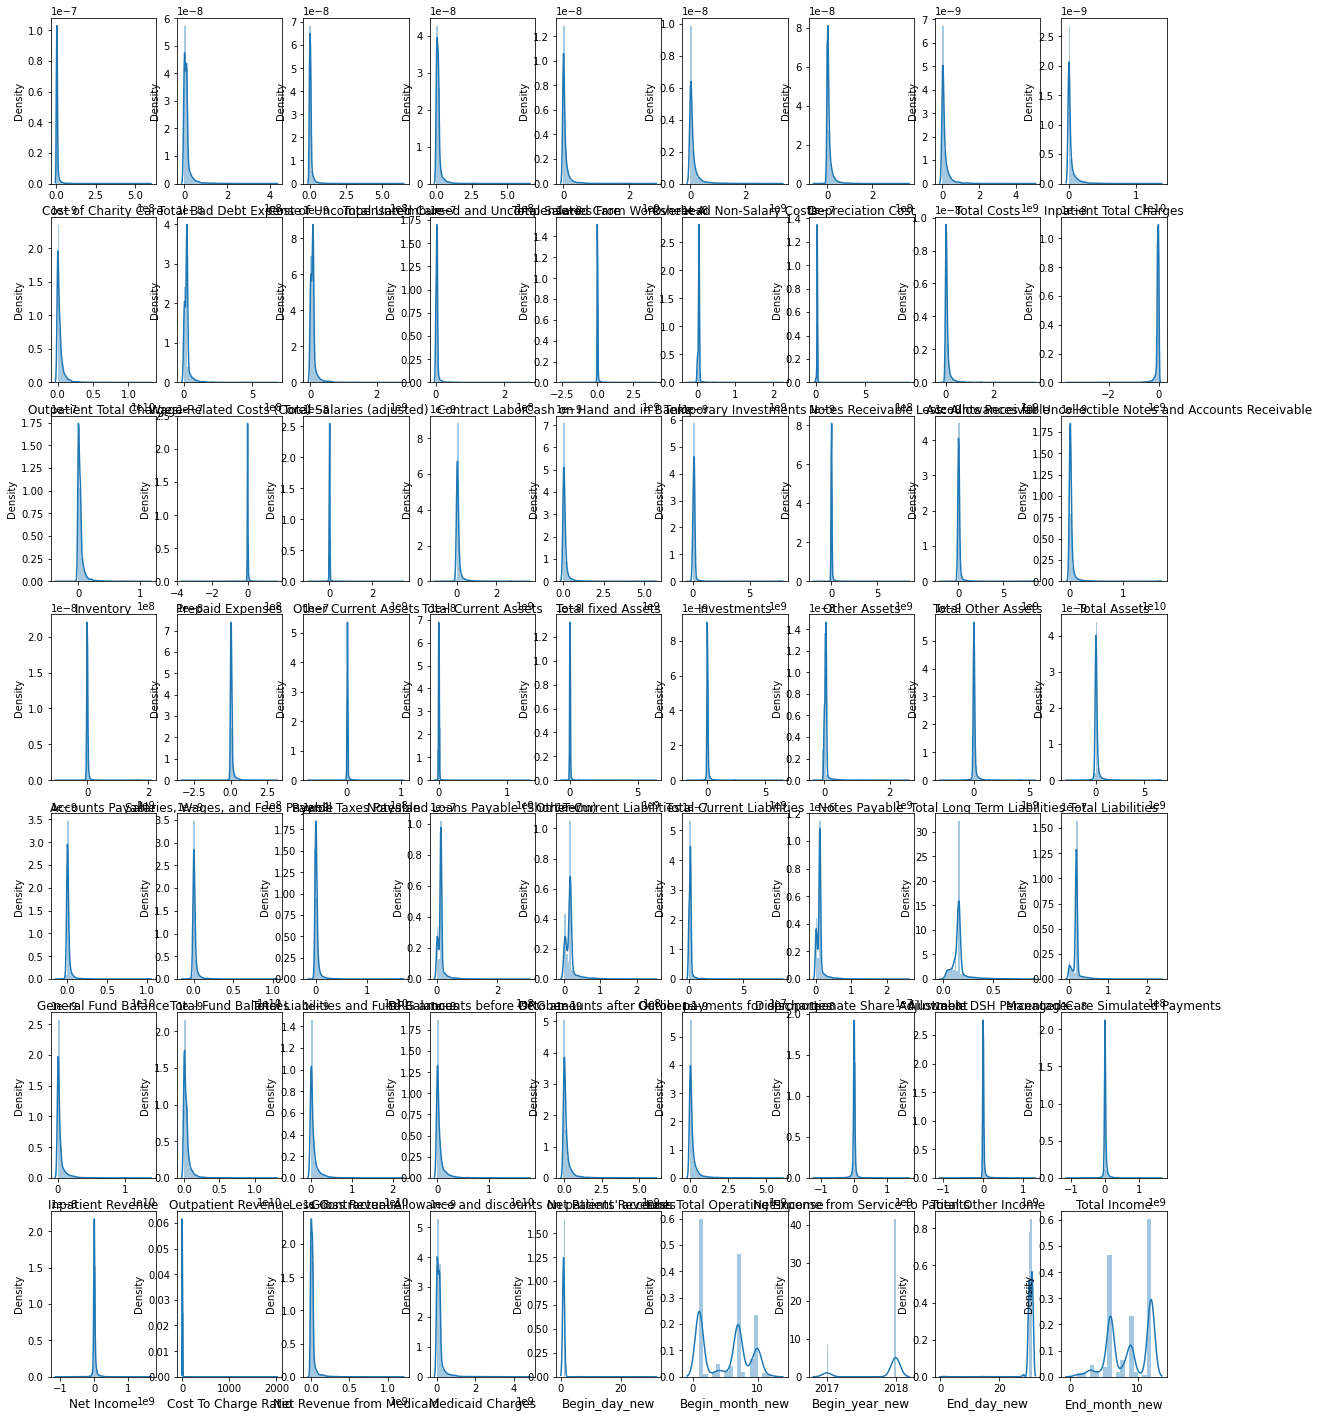

In [45]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=63 :    
        ax = plt.subplot(7,9,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

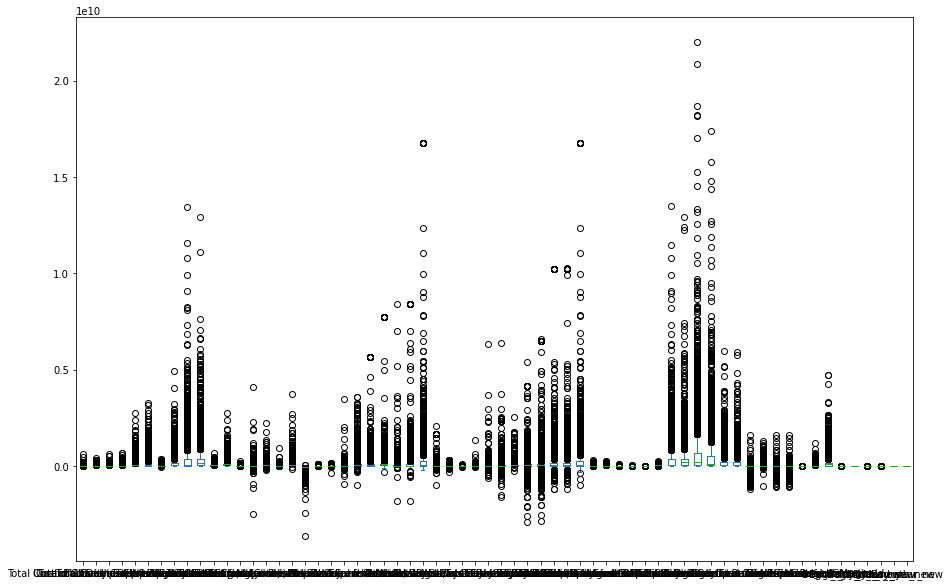

In [46]:
df1.plot(kind='box',figsize=(15,10))
plt.show()

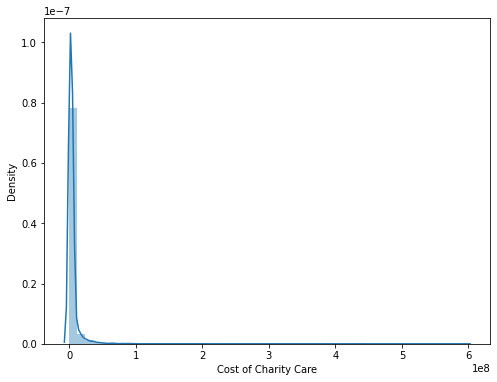

In [47]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Cost of Charity Care'])
plt.show()

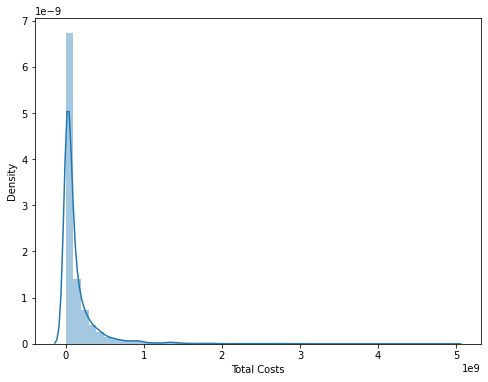

In [48]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Total Costs'])
plt.show()

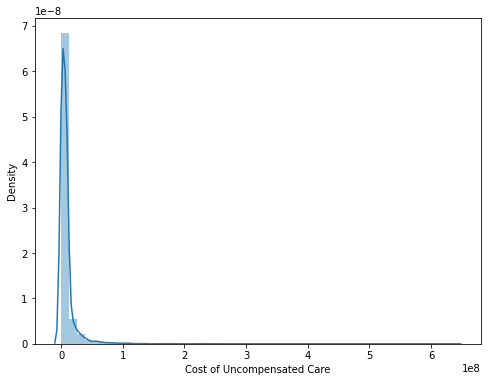

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Cost of Uncompensated Care'])
plt.show()

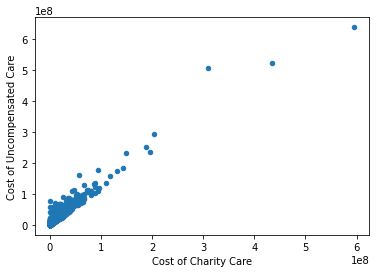

In [50]:
df.plot(x='Cost of Charity Care',y='Cost of Uncompensated Care',kind='scatter')
plt.show()

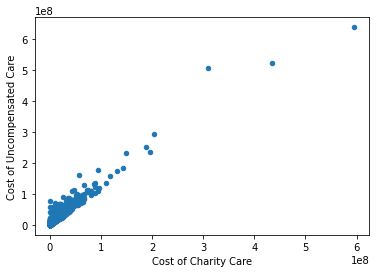

In [51]:
df.plot(x='Cost of Charity Care',y='Cost of Uncompensated Care',kind='scatter')
plt.show()

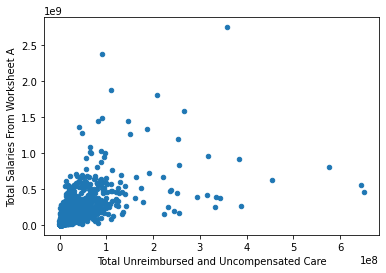

In [52]:
df.plot(x='Total Unreimbursed and Uncompensated Care',y='Total Salaries From Worksheet A',kind='scatter')
plt.show()

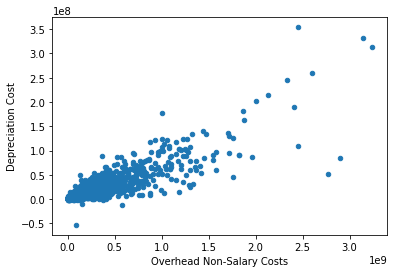

In [53]:
df.plot(x='Overhead Non-Salary Costs',y='Depreciation Cost',kind='scatter')
plt.show()

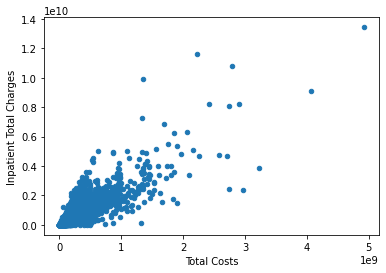

In [54]:
df.plot(x='Total Costs',y='Inpatient Total Charges',kind='scatter')
plt.show()

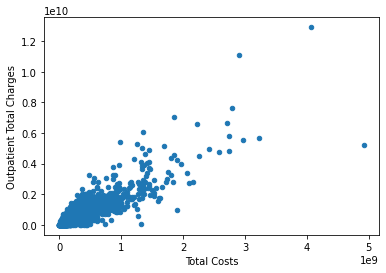

In [55]:
df.plot(x='Total Costs',y='Outpatient Total Charges',kind='scatter')
plt.show()

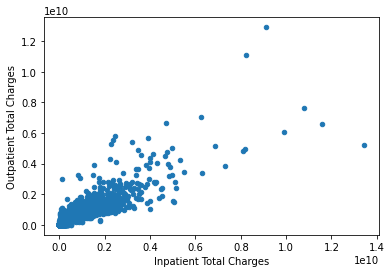

In [56]:
df.plot(x='Inpatient Total Charges',y='Outpatient Total Charges',kind='scatter')
plt.show()

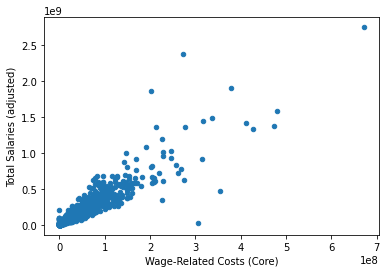

In [57]:
df.plot(x='Wage-Related Costs (Core)',y='Total Salaries (adjusted)',kind='scatter')
plt.show()

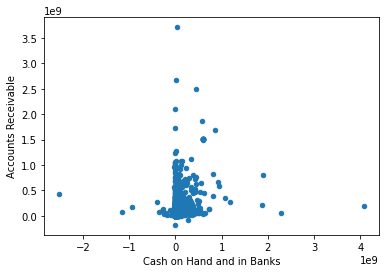

In [58]:
df.plot(x='Cash on Hand and in Banks',y='Accounts Receivable',kind='scatter')
plt.show()

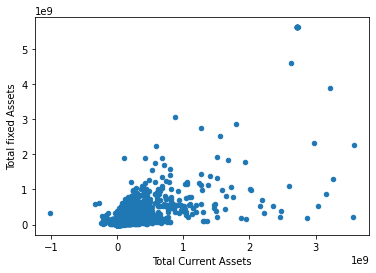

In [59]:
df.plot(x='Total Current Assets',y='Total fixed Assets',kind='scatter')
plt.show()

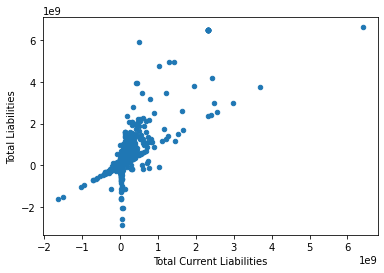

In [60]:
df.plot(x='Total Current Liabilities',y='Total Liabilities',kind='scatter')
plt.show()

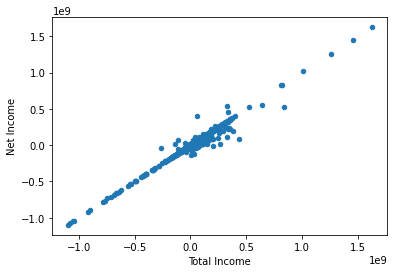

In [61]:
df.plot(x='Total Income',y='Net Income',kind='scatter')
plt.show()

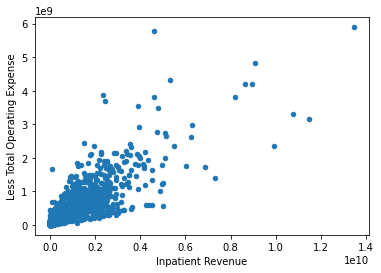

In [62]:
df.plot(x='Inpatient Revenue',y='Less Total Operating Expense',kind='scatter')
plt.show()

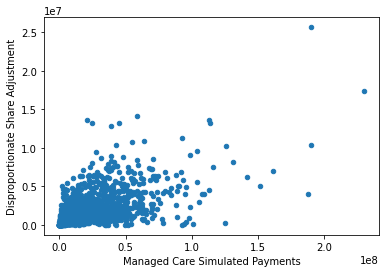

In [63]:
df.plot(x='Managed Care Simulated Payments',y='Disproportionate Share Adjustment',kind='scatter')
plt.show()

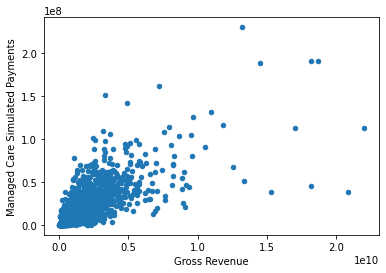

In [64]:
df.plot(x='Gross Revenue',y='Managed Care Simulated Payments',kind='scatter')
plt.show()

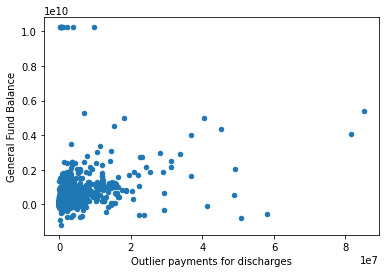

In [65]:
df.plot(x='Outlier payments for discharges',y='General Fund Balance',kind='scatter')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df1.drop('Total Costs', axis=1)
Y = df1['Total Costs']

In [68]:
X.head()

,Cost of Charity Care,Total Bad Debt Expense,Cost of Uncompensated Care,Total Unreimbursed and Uncompensated Care,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Depreciation Cost,Inpatient Total Charges,Outpatient Total Charges,Wage-Related Costs (Core),...,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Begin_day_new,Begin_month_new,Begin_year_new,End_day_new,End_month_new,End_year_new
0,4.016000e+03,263275.0,129929.0,260140.0,526707.0,797750.0,33286.0,305911.0,1815840.0,119947.0,...,82928.0,0.492667,9.565000e+03,2.837130e+05,1,10,2017,13,11,2017
1,4.742004e+06,1984928.0,251208.0,251208.0,3013251.0,5892944.0,288014.0,27741068.0,37740707.0,640965.0,...,-322251.0,0.119055,1.820912e+06,1.843261e+07,1,11,2017,31,12,2017
2,4.742004e+06,500576.0,152458.0,152458.0,1009269.0,1543566.0,30861.0,1903545.0,4146026.0,158661.0,...,-1026398.0,0.304565,2.339393e+07,1.393780e+08,11,10,2017,31,12,2017
3,5.197140e+05,4922623.0,1605581.0,1649925.0,14205165.0,20882227.0,1314021.0,88037338.0,52039842.0,5139813.0,...,-370783.0,0.208266,6.070085e+06,4.648493e+07,1,1,2018,28,2,2018
4,6.721210e+05,20492826.0,7466444.0,14922893.0,37145295.0,81178869.0,4345110.0,171935739.0,125719996.0,10521192.0,...,-11676899.0,0.328278,1.267734e+07,8.031766e+07,1,1,2018,28,2,2018


In [69]:
Y.head()

0     1045317.0
1     7795912.0
2     1842485.0
3    29173301.0
4    97713796.0
Name: Total Costs, dtype: float64

In [70]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scalar = scalar.fit_transform(X)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_scalar, Y, test_size=0.30, random_state=42)

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [73]:
dtr.score(x_train,y_train)

1.0

In [74]:
dtr.score(x_test,y_test)

0.9204733955610601

In [75]:
from sklearn.linear_model import LinearRegression
liner_model = LinearRegression()

In [76]:
liner_model.fit(x_train,y_train)

LinearRegression()

In [77]:
liner_model.score(x_test, y_test)

0.9801070532896587

In [78]:
liner_model.score(x_train,y_train)

0.9888064421060294

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [80]:
x_train,y_train = make_regression(n_features=63, n_informative=2, random_state=0, shuffle=False)

In [81]:
randfreg = RandomForestRegressor(max_depth=3, random_state=0)

In [82]:
randfreg.fit(x_train,y_train)
randfreg.score(x_train,y_train)

0.9301010470038201